In [ ]:
import helpers
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse
import shin_metiu_full as sf
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from auto_plotter import autoplotter, prep_dfs

mpl.rcParams['text.usetex'] = True
sns.set_context(
    "talk",
    rc={
        "text.usetex": True,
        "font.size": 18,
        "axes.titlesize": 18,
        "axes.labelsize": 18,
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "legend.fontsize": 16,
        "legend.loc": "lower left",
        "legend.frameon": False,
        "font.family": "serif",
        "font.serif": "Times New Roman",
    },
)
df,df_coef = helpers.S8to10_loader()

# Figure S8

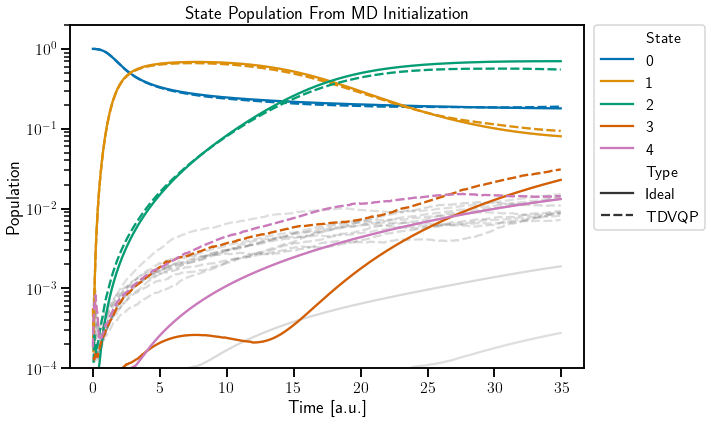

In [4]:
fig, ax = plt.subplots(figsize=((10, 6)))
sns.lineplot(data=df_coef.query('State<15 & Population>1e-4 &Type!="Exact" & Simulation=="MD" '),x='Time',y='Population',hue='State',style='Type',ci=None,ax=ax,legend=None,alpha=0.15,palette=sns.dark_palette(color='black'))
sns.lineplot(data=df_coef.query('State<5 & Population>1e-4 &Type!="Exact" & Simulation=="MD" '),x='Time',y='Population',hue='State',style='Type',ci=None,ax=ax,palette=sns.color_palette("colorblind"))
plt.xlabel(r'Time [a.u.]')
plt.ylim([1e-4,2])
plt.yscale('log')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title(r'State Population From MD Initialization')
plt.tight_layout()


# Figure S9

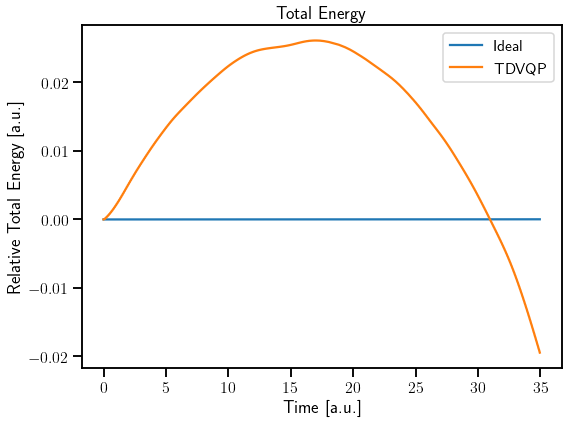

In [14]:
fig, ax = plt.subplots(figsize=((8, 6)))
sns.lineplot(data=df.query('Simulation=="Single"'), x="times", y="ideal_energy", ci=None, ax=ax,label='Ideal')
sns.lineplot(data=df.query('Simulation=="Single"'), x="times", y="QC_energy", ax=ax, ci=None, palette="colorblind",label='TDVQP')

plt.ylabel(r'Relative Total Energy [a.u.]')
plt.xlabel(r'Time [a.u.]')
plt.title(r'Total Energy')
plt.tight_layout()

plt.savefig("custom_plots/S_energy_long.pdf")

# Figure S10

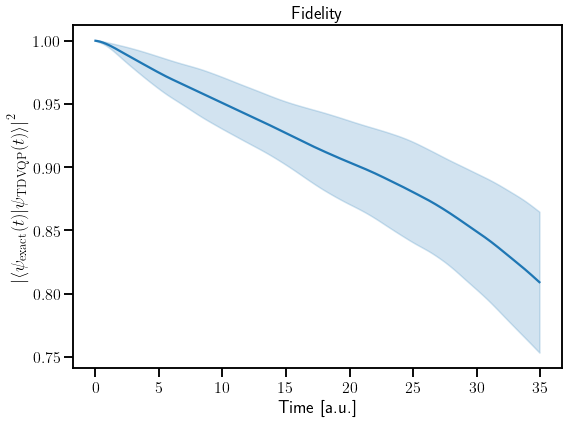

In [7]:
fig, ax = plt.subplots(figsize=((8, 6)))
sns.lineplot(data=df, x="times", y="fidelity_to_exact", ci="sd", ax=ax, palette=sns.color_palette('colorblind'))#, label = 'compared to exact evoltuion of VQE state')
ax.set(ylabel=r'$\left |\langle\psi_\mathrm{exact}(t)|\psi_\mathrm{TDVQP}(t)\rangle\right |^2 $',xlabel= r'Time [a.u.]')
plt.title('Fidelity')
plt.tight_layout()

plt.savefig("custom_plots/idelity_long.pdf")